## **Data Visulization**

- Relationship with the variables:
  * Pairwise Plots:
    Relationships among Price, Beds, Baths, and PropertySqft.
    
- Heatmaps:
  Correlation matrix including Scores, Price, and distances.

-  Geographic Insights

   
- Accessibility and Distance Analysis
  * Bar Charts/Boxplots:
    Distribution of distances to transportation, hospitals, or schools.
  * Scatter Plots:
    Price or Walk Score against dist_transportation_meters or other distance variables.


In [141]:
pip install seaborn


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   --------------------------- ------------ 204.8/294.9 kB 6.3 MB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 3.5 MB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 3.5 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.3 MB/s eta 0:00:00


In [34]:
import pandas as pd
import folium
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import numpy as np
from geopy.geocoders import Nominatim

In [35]:
# NY_County Dataset
df = pd.read_csv("C:/Users/1999i/Documents/data mange/Lab Lectures/Project/Data/DATASET_NY_COUNTY.csv")
df.head(3)

,BROKERTITLE,TYPE,STATE,State_City,Neighborhood,Location,Loc_Neighborhood,Loc_City,Loc_ZIP,LATITUDE,...,PRICE,BEDS,BATH,PROPERTYSQFT,Walk Score,Transit Score,Bike Score,dist_transportation_meters,dist_hospital_meters,distance_to_school
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,"New York, NY 10022",New York,"New York, NY 10022","Midtown East, New York, 10022",Midtown East,New York,10022.0,40.761255,...,315000,2,2.0,1400.0,100,100.0,82,58.954601,947.576865,0.001492
1,Brokered by Serhant,Condo for sale,"New York, NY 10019",New York,"New York, NY 10019","Hell's Kitchen, New York, 10019",Hell's Kitchen,New York,10019.0,40.766393,...,195000000,7,10.0,17545.0,93,100.0,91,72.079494,1014.645953,0.003276
2,Brokered by COMPASS,Condo for sale,"Manhattan, NY 10022",Manhattan,"Manhattan, NY 10022","Midtown East, New York, 10022",Midtown East,New York,10022.0,40.761398,...,69000,3,1.0,445.0,100,100.0,82,43.838720,955.012851,0.001587


### **Descriptive Statistics**

In [3]:
df[['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT', 'Walk Score', 'Transit Score',	'Bike Score', 'dist_transportation_meters',
    'dist_hospital_meters',	'distance_to_school']].describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,Walk Score,Transit Score,Bike Score,dist_transportation_meters,dist_hospital_meters,distance_to_school
count,1.182000e+03,1182.000000,1182.000000,1182.000000,1182.000000,1176.000000,1182.000000,1182.000000,1182.000000,1182.000000
mean,5.636089e+06,2.900169,2.462775,2357.622515,95.582910,99.359694,82.990694,145.044060,1123.394824,0.002579
std,6.289851e+07,2.259278,1.971830,1864.468974,12.513883,3.353607,11.109375,105.026405,827.984333,0.001456
min,2.494000e+03,1.000000,0.000000,230.000000,19.000000,48.000000,39.000000,9.865844,59.131352,0.000190
25%,6.792500e+05,2.000000,1.000000,1375.250000,98.000000,100.000000,82.000000,72.728025,555.729628,0.001557
50%,1.412500e+06,3.000000,2.000000,2184.207862,99.000000,100.000000,84.000000,123.118508,900.734597,0.002346
75%,3.898750e+06,3.000000,3.000000,2184.207862,100.000000,100.000000,90.000000,196.094698,1440.703689,0.003352
max,2.147484e+09,32.000000,20.000000,24000.000000,100.000000,100.000000,99.000000,1841.295991,6389.130433,0.014461


### **Pairwise Plot**

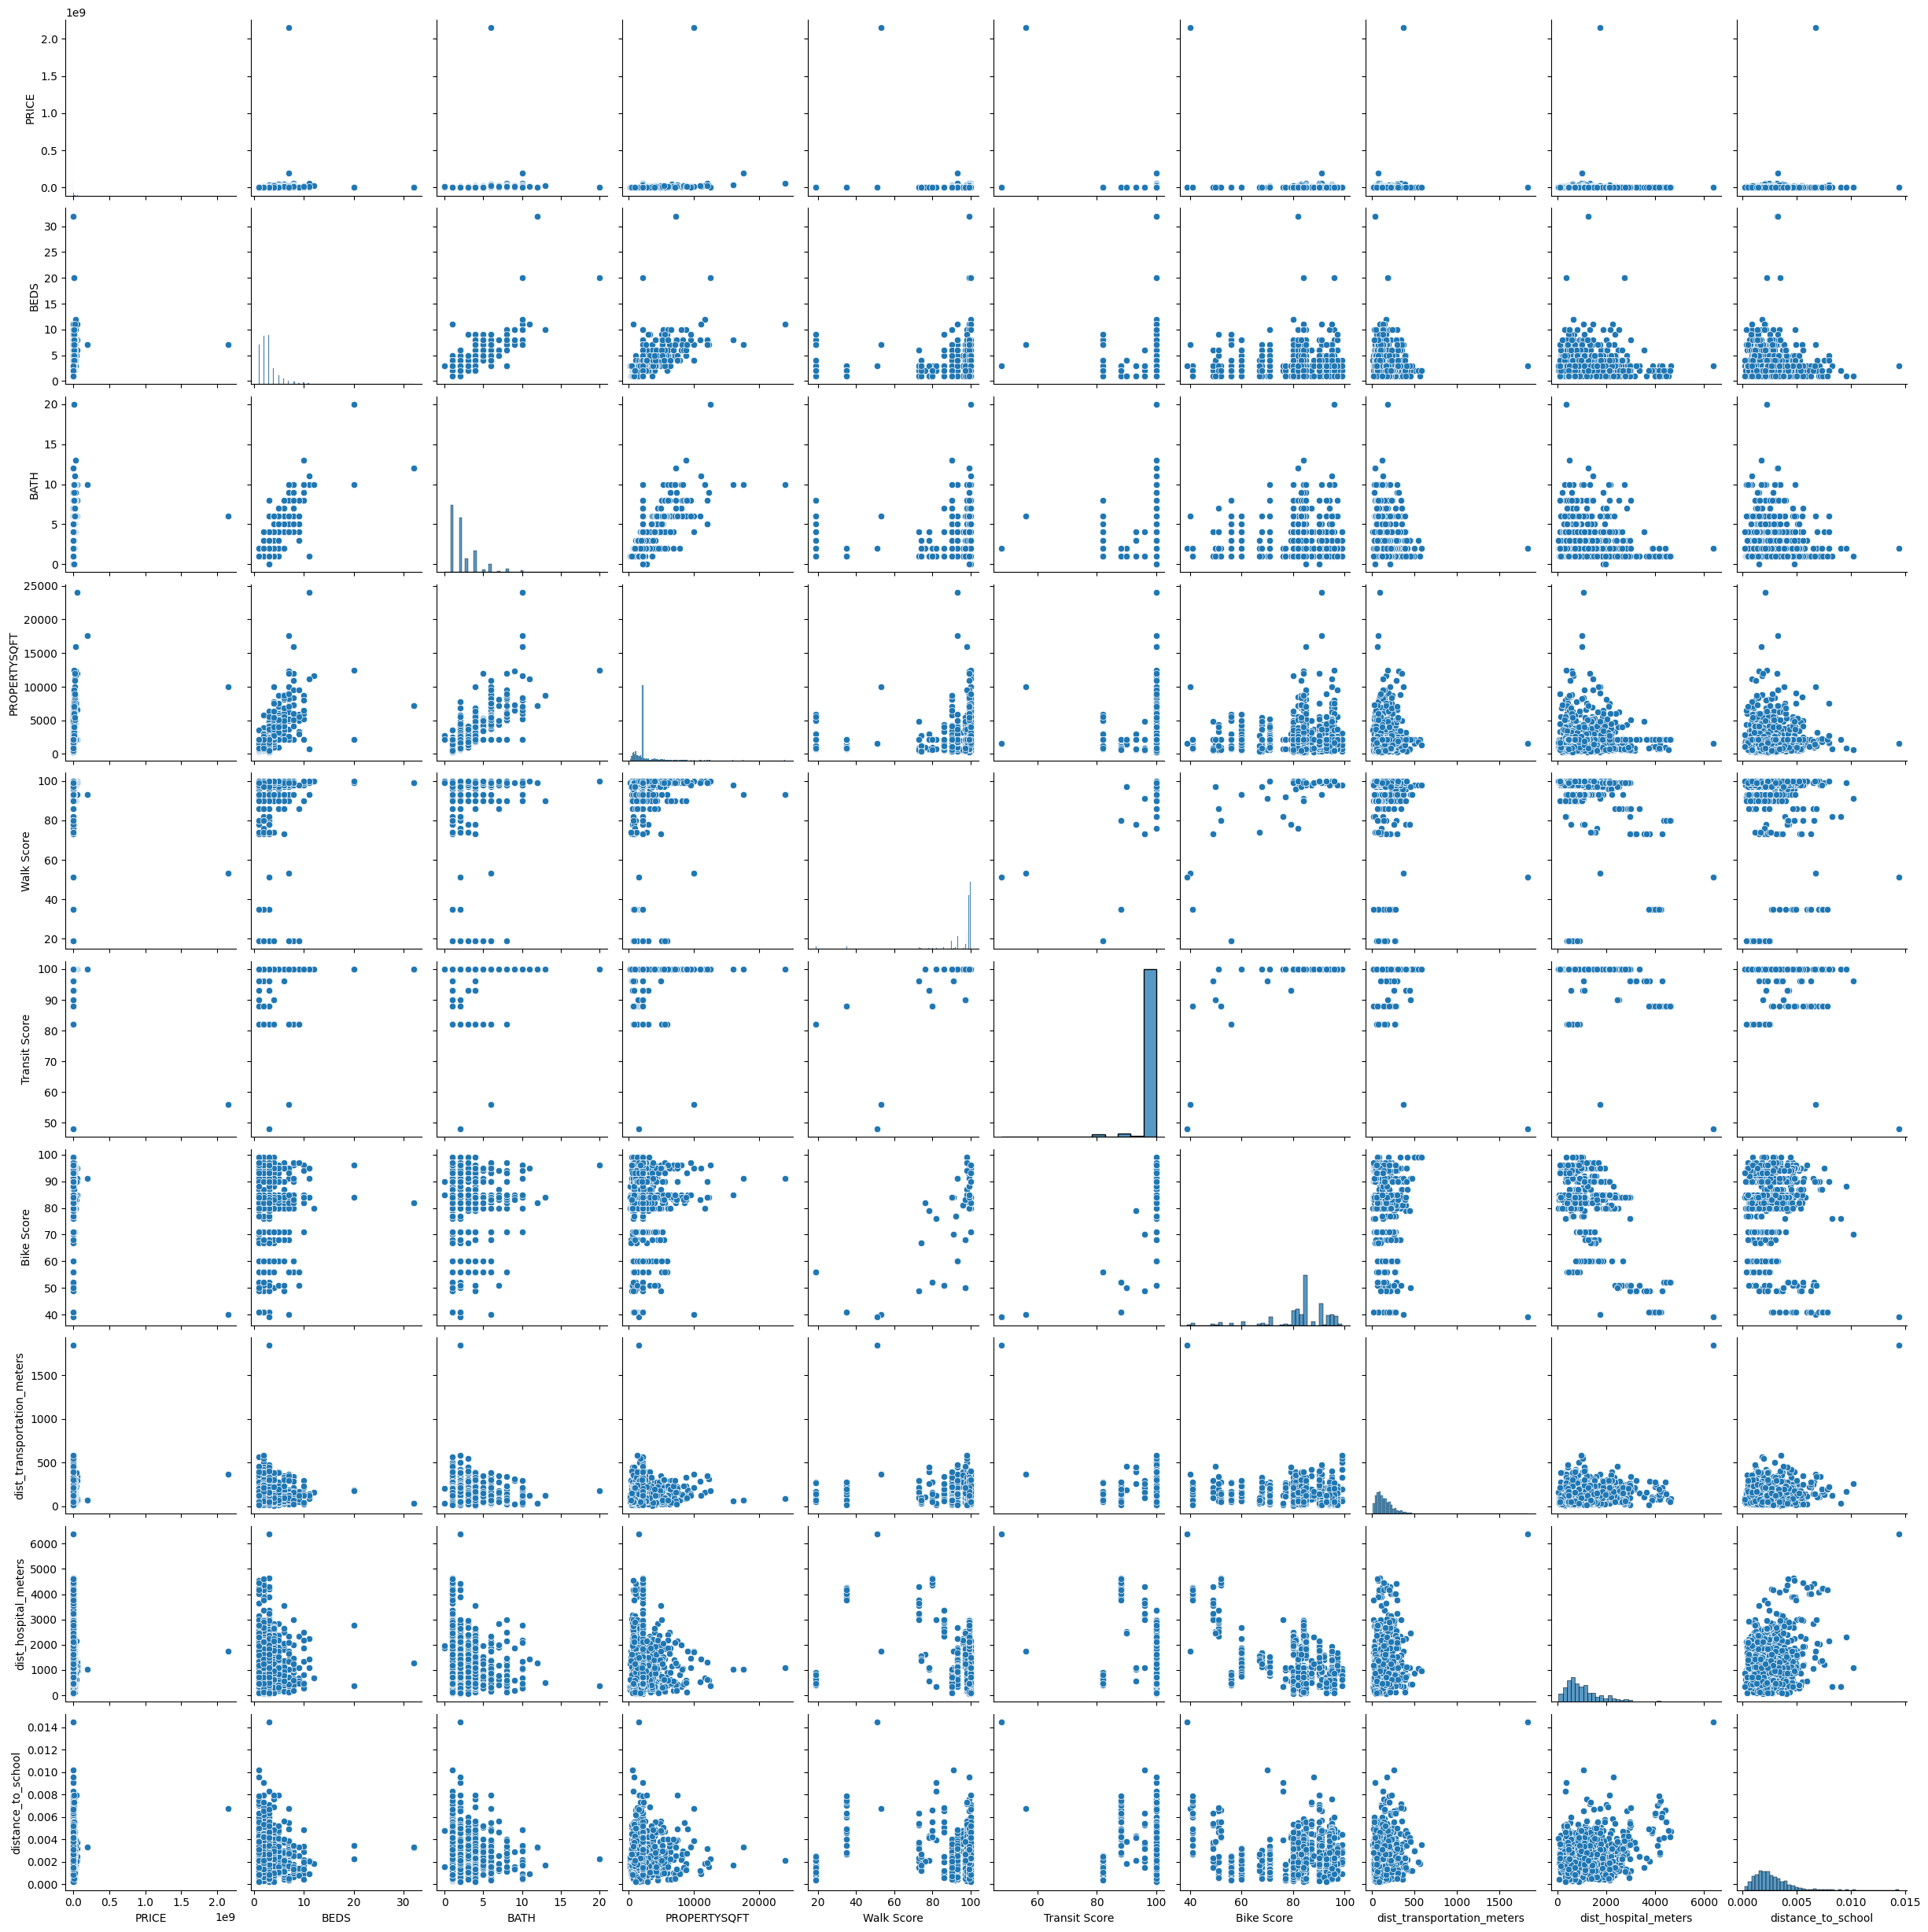

In [143]:
# Pairwise plot

numeric_cols = [
    'PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT',
    'Walk Score', 'Transit Score', 'Bike Score', 'dist_transportation_meters',
    'dist_hospital_meters', 'distance_to_school'
]

# Pairwise plot
sns.pairplot(df[numeric_cols])
plt.show()


### **Corelation Heatmap**

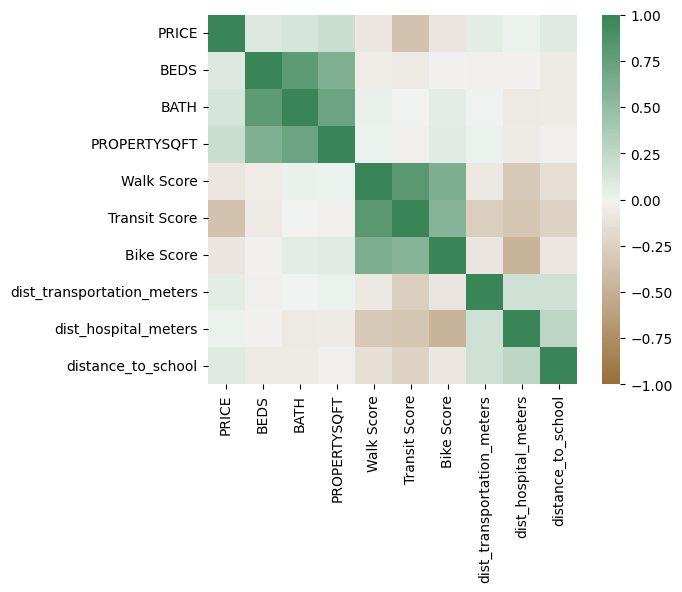

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

full = df[[ 'PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT',
    'Walk Score', 'Transit Score', 'Bike Score', 'dist_transportation_meters',
    'dist_hospital_meters', 'distance_to_school']]
correlation_ = full.corr()

axis_corr = sns.heatmap(
correlation_,
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(50, 500, n=500),
square=True
)

#plt.savefig("C:/Users/1999i/Documents/data mange/Lab Lectures/Project/plots/correlation_heatmap.jpg", dpi=300, bbox_inches="tight")

plt.show()


In [6]:
correlation_

,PRICE,BEDS,BATH,PROPERTYSQFT,Walk Score,Transit Score,Bike Score,dist_transportation_meters,dist_hospital_meters,distance_to_school
PRICE,1.000000,0.101018,0.126105,0.201632,-0.090590,-0.366301,-0.094397,0.060083,0.013146,0.085705
BEDS,0.101018,1.000000,0.793273,0.606440,-0.044901,-0.051369,-0.012958,-0.021416,-0.008708,-0.047048
BATH,0.126105,0.793273,1.000000,0.705807,0.022241,0.006877,0.056245,0.000582,-0.064851,-0.049014
PROPERTYSQFT,0.201632,0.606440,0.705807,1.000000,0.013947,-0.021558,0.073713,0.012267,-0.048869,-0.015821
Walk Score,-0.090590,-0.044901,0.022241,0.013947,1.000000,0.825298,0.627785,-0.072897,-0.300171,-0.146021
Transit Score,-0.366301,-0.051369,0.006877,-0.021558,0.825298,1.000000,0.566082,-0.267194,-0.330421,-0.237070
Bike Score,-0.094397,-0.012958,0.056245,0.073713,0.627785,0.566082,1.000000,-0.098566,-0.468923,-0.086137
dist_transportation_meters,0.060083,-0.021416,0.000582,0.012267,-0.072897,-0.267194,-0.098566,1.000000,0.169998,0.165355
dist_hospital_meters,0.013146,-0.008708,-0.064851,-0.048869,-0.300171,-0.330421,-0.468923,0.169998,1.000000,0.269773
distance_to_school,0.085705,-0.047048,-0.049014,-0.015821,-0.146021,-0.237070,-0.086137,0.165355,0.269773,1.000000


### **New York County boundries**

New York County corresponds to Manhattan. From the list you've provided, the following cities and neighborhoods are relevant to New York County (Manhattan):

* New York (New York City is often synonymous with Manhattan)
* Manhattan (New York County itself)
* Roosevelt Island (technically part of Manhattan, though geographically located in the East River)
* New York City (referring to the whole city, but also used interchangeably for Manhattan)

In [7]:
gdf = gpd.read_file("C:/Users/1999i/Documents/data mange/Lab Lectures/Project/Data/DSNY Zones_20250124/geo_export_763b9ef4-cf2a-4d02-957b-611b4071171d.shp")
# Documents/data mange/Lab Lectures/Project/Data/DSNY Zones_20250124/geo_export_763b9ef4-cf2a-4d02-957b-611b4071171d.shp
# Print the first few rows of the GeoDataFrame
print(gdf.head())

  zone        zonename borocode objectid    shape_area     shape_leng  \
0   QW     Queens West        4       13  9.656035e+08  231733.514476   
1  BKS  Brooklyn South        3        9  1.200796e+09  681821.032616   
2   SI   Staten Island        5       64  1.623821e+09  330466.836307   
3   MN       Manhattan        1       33  6.306656e+08  321451.700643   
4   BX           Bronx        2       42  1.171946e+09  442387.774995   

                                            geometry  
0  MULTIPOLYGON (((-73.90647 40.79018, -73.90251 ...  
1  MULTIPOLYGON (((-74.00441 40.69253, -74.00197 ...  
2  MULTIPOLYGON (((-74.08221 40.64828, -74.08212 ...  
3  MULTIPOLYGON (((-73.92641 40.87762, -73.92635 ...  
4  MULTIPOLYGON (((-73.87295 40.90444, -73.87095 ...  


In [15]:
def assign_zone(Loc_ZIP):
    if pd.isna(Loc_ZIP):
        return 'Unknown'
    elif Loc_ZIP in range(10001, 10282):  # Manhattan ZIP codes
        return 'Manhattan'
    elif Loc_ZIP in range(10451, 10475):  # Bronx ZIP codes
        return 'Bronx'
    elif Loc_ZIP in range(11201, 11249):  # Brooklyn ZIP codes
        if Loc_ZIP <= 11215:
            return 'Brooklyn North'
        else:
            return 'Brooklyn South'
    elif Loc_ZIP in range(11101, 11109):  # Queens West ZIP codes
        return 'Queens West'
    elif Loc_ZIP in range(11354, 11697):  # Queens East ZIP codes
        return 'Queens East'
    elif Loc_ZIP in range(10301, 10315):  # Staten Island ZIP codes
        return 'Staten Island'
    else:
        return 'Other'

# Apply the function to the DataFrame
df['Zone'] = df['Loc_ZIP'].apply(assign_zone)

# Display the resulting DataFrame


In [16]:
df.head()

,BROKERTITLE,TYPE,STATE,State_City,Neighborhood,Location,Loc_Neighborhood,Loc_City,Loc_ZIP,LATITUDE,...,BEDS,BATH,PROPERTYSQFT,Walk Score,Transit Score,Bike Score,dist_transportation_meters,dist_hospital_meters,distance_to_school,Zone
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,"New York, NY 10022",New York,"New York, NY 10022","Midtown East, New York, 10022",Midtown East,New York,10022.0,40.761255,...,2,2.0,1400.000000,100,100.0,82,58.954601,947.576865,0.001492,Manhattan
1,Brokered by Serhant,Condo for sale,"New York, NY 10019",New York,"New York, NY 10019","Hell's Kitchen, New York, 10019",Hell's Kitchen,New York,10019.0,40.766393,...,7,10.0,17545.000000,93,100.0,91,72.079494,1014.645953,0.003276,Manhattan
2,Brokered by COMPASS,Condo for sale,"Manhattan, NY 10022",Manhattan,"Manhattan, NY 10022","Midtown East, New York, 10022",Midtown East,New York,10022.0,40.761398,...,3,1.0,445.000000,100,100.0,82,43.838720,955.012851,0.001587,Manhattan
3,Brokered by Douglas Elliman - 575 Madison Ave,Condo for sale,"New York, NY 10027",New York,"New York, NY 10027","Manhattan, New York, 10027",Manhattan,New York,10027.0,40.809448,...,2,2.0,2184.207862,93,100.0,60,170.252965,1152.987304,0.001109,Manhattan
4,Brokered by Corcoran Chelsea/Flatiron,Co-op for sale,"New York, NY 10014",New York,"New York, NY 10014","West Village, New York, 10014",West Village,New York,10014.0,40.738298,...,3,1.0,2184.207862,98,100.0,94,54.583331,428.760776,0.004152,Manhattan


In [18]:
count = df.groupby(['Zone']).size().reset_index(name='property_count')
count

,Zone,property_count
0,Bronx,3
1,Brooklyn South,1
2,Manhattan,1167
3,Other,1
4,Queens West,1
5,Staten Island,2
6,Unknown,7


In [25]:
merged_df = pd.merge(gdf, count, left_on="zonename", right_on="Zone", how="inner")
m = folium.Map(location=[40.4774, -74.2591], tiles="CartoDB Positron", zoom_start=12)

folium.Choropleth(
    geo_data=merged_df,
    name="choropleth",
    data=merged_df,
    columns=["zonename", "property_count"],  # The column with regions and the data to visualize
 #   key_on="feature.properties.DISTRICT",  # The key in the GeoJSON properties
    fill_color="YlGnBu",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Crime count per District - Year 2016"
).add_to(m)

m

## **MongoDB with python - Quering with JSON Documents**

In [36]:
import pymongo
import pandas as pd
import json

In [37]:
client = pymongo.MongoClient("mongodb://127.0.0.1:27017/")
db = client['Data_Management']  
collection = db['NY_Housing_Market'] 

In [9]:
data_dict = df.to_dict('records')
# Insert data into MongoDB
collection.insert_many(data_dict)

InsertManyResult([ObjectId('67923a84fd97f225d810e33d'), ObjectId('67923a84fd97f225d810e33e'), ObjectId('67923a84fd97f225d810e33f'), ObjectId('67923a84fd97f225d810e340'), ObjectId('67923a84fd97f225d810e341'), ObjectId('67923a84fd97f225d810e342'), ObjectId('67923a84fd97f225d810e343'), ObjectId('67923a84fd97f225d810e344'), ObjectId('67923a84fd97f225d810e345'), ObjectId('67923a84fd97f225d810e346'), ObjectId('67923a84fd97f225d810e347'), ObjectId('67923a84fd97f225d810e348'), ObjectId('67923a84fd97f225d810e349'), ObjectId('67923a84fd97f225d810e34a'), ObjectId('67923a84fd97f225d810e34b'), ObjectId('67923a84fd97f225d810e34c'), ObjectId('67923a84fd97f225d810e34d'), ObjectId('67923a84fd97f225d810e34e'), ObjectId('67923a84fd97f225d810e34f'), ObjectId('67923a84fd97f225d810e350'), ObjectId('67923a84fd97f225d810e351'), ObjectId('67923a84fd97f225d810e352'), ObjectId('67923a84fd97f225d810e353'), ObjectId('67923a84fd97f225d810e354'), ObjectId('67923a84fd97f225d810e355'), ObjectId('67923a84fd97f225d810e3

## **Queries**
-> 1. Calculating the average price, propert sqft and total number of properties available for each neighborhood.

-> 2. Add a new field, Price_Per_SqFt, calculated as PRICE / PROPERTYSQFT.

-> 3. Find Properties Close to Transportation (properties within 100 meters of a transportation hub and have a walk score of 90 or more./ Properties Near Specific School Distance)

-> 4. Highest Individual housing listed.






In [38]:
collection.find_one()

{'_id': ObjectId('67923a84fd97f225d810e33d'),
 'BROKERTITLE': 'Brokered by Douglas Elliman  -111 Fifth Ave',
 'TYPE': 'Condo for sale',
 'STATE': 'New York, NY 10022',
 'State_City': 'New York',
 'Neighborhood': 'New York, NY 10022',
 'Location': 'Midtown East, New York, 10022',
 'Loc_Neighborhood': 'Midtown East',
 'Loc_City': 'New York',
 'Loc_ZIP': 10022.0,
 'LATITUDE': 40.761255,
 'LONGITUDE': -73.9744834,
 'geometry': 'POINT (-73.9744834 40.761255)',
 'PRICE': 315000,
 'BEDS': 2,
 'BATH': 2.0,
 'PROPERTYSQFT': 1400.0,
 'Walk Score': 100,
 'Transit Score': 100.0,
 'Bike Score': 82,
 'dist_transportation_meters': 58.95460094303595,
 'dist_hospital_meters': 947.576865198542,
 'distance_to_school': 0.0014924203161332,
 'PRICE_PER_SqFt': 225.0}

In [18]:
# propeties below $5000,000
# for document in collection.find({'PRICE': {'$lt': 5000000}}):
#  print(document)

# properties in a specific neighbourhood
# for document in collection.find({'Loc_Neighborhood': 'Midtown East'}):
#     print(document)

# properties at least 2 beds and baths
# for doc in collection.find({'BEDS': {'$gte':2}, 'BATH': {'$gte': 2}}):
#    print(doc)

# number of properties based on the neigbourhood
# result = collection.aggregate([
#     {'$group': {'_id': '$Loc_Neighborhood', 'count': {'$sum': 1}}}
# ])
# for doc in result:
#     print(doc)
                                 

### **1. Calculating the average price/property sqft and total number of properties available for each neighborhood.**

In [31]:
# 1. Calculating the average price/property sqft and total number of properties available for each neighborhood.
result = [
    {
        '$group': {
            '_id': '$Loc_Neighborhood',
            'LATITUDE': {'$avg': '$LATITUDE'},
            'LONGITUDE': {'$avg': '$LONGITUDE'},
            'AVERAGE_PRICE': {'$avg': '$PRICE'},
            'AVERAGE_PROPERTYSQFT': {'$avg': '$PROPERTYSQFT'},
            'TOTAL_PROPERTIES': {'$sum': 1}
        }
    },
    {'$sort': {'AVERAGE_PRICE': -1}}
]

results = collection.aggregate(result)

#for doc in results:
#    print(doc)

dati = list(results)

dd = pd.DataFrame(dati)
dd['PRICE_IN_MILLIONS'] = (dd['AVERAGE_PRICE'] / 1e6).round(2)
dd['AVERAGE_PROPERTYSQFT_ROUNDED'] = dd['AVERAGE_PROPERTYSQFT'].round()
dd

,_id,LATITUDE,LONGITUDE,AVERAGE_PRICE,AVERAGE_PROPERTYSQFT,TOTAL_PROPERTIES,PRICE_IN_MILLIONS,AVERAGE_PROPERTYSQFT_ROUNDED
0,Charleston,40.518484,-74.224418,2.147484e+09,10000.000000,1,2147.48,10000.0
1,SoHo,40.723435,-74.002723,8.090467e+06,3305.706851,61,8.09,3306.0
2,Tribeca,40.714659,-74.009504,8.073875e+06,3132.075491,16,8.07,3132.0
3,Hell's Kitchen,40.764430,-73.984247,6.667653e+06,2317.721519,72,6.67,2318.0
4,Upper East Side,40.769461,-73.962088,5.680777e+06,2651.063728,157,5.68,2651.0
5,Chelsea,40.742980,-73.998212,5.634704e+06,2663.017406,71,5.63,2663.0
6,East Village,40.734939,-73.988151,5.259455e+06,4393.075586,11,5.26,4393.0
7,West Village,40.734601,-74.005017,4.206226e+06,2352.504680,42,4.21,2353.0
8,Garment District,40.752116,-73.986776,3.319667e+06,2065.402621,3,3.32,2065.0
9,Manhattan,40.777909,-73.967083,3.245218e+06,2192.010897,300,3.25,2192.0


In [10]:
# average property prices 
map = folium.Map(location=[dd.LATITUDE.mean(), dd.LONGITUDE.mean()], zoom_start=15, control_scale=True,
                 tiles="OpenStreetMap")


for index, location_info in dd.iterrows():
    folium.Marker(
        [location_info["LATITUDE"], location_info["LONGITUDE"]],
        popup=f"Location: {location_info['_id']}, Average price in millions: {location_info['PRICE_IN_MILLIONS']}, Average property sqft: {location_info['AVERAGE_PROPERTYSQFT_ROUNDED']}"
    ).add_to(map)

for index, location_info in dd.iterrows():
    folium.Marker(
        [location_info["LATITUDE"], location_info["LONGITUDE"]],
        # popup=folium.Popup(f'Crime Count: {location_info["crime_count"]}', max_width=300),
        popup=f"Average price in millions: {location_info['PRICE_IN_MILLIONS']}",
        icon=folium.DivIcon(
            icon_size=(150, 36),
            icon_anchor=(0, 0),
            html=f'<div style="font-size: 12pt; color: darkblue;">{location_info["PRICE_IN_MILLIONS"]}</div>',
        )
    ).add_to(map)

# Save the map
#map_save_path = '/content/drive/MyDrive/Data_smart_city/maps/a1_district_2018.html'
map_save_path = 'C:/Users/1999i/Documents/data mange/Lab Lectures/Project/plots/avg_property_prices.html'

map.save(map_save_path)
map

In [11]:
# map for property sqft
map = folium.Map(location=[dd.LATITUDE.mean(), dd.LONGITUDE.mean()], zoom_start=15, control_scale=True,
                 tiles="OpenStreetMap")


for index, location_info in dd.iterrows():
    folium.Marker(
        [location_info["LATITUDE"], location_info["LONGITUDE"]],
        popup=f"Location: {location_info['_id']}, Average price in millions: {location_info['PRICE_IN_MILLIONS']}, Average property sqft: {location_info['AVERAGE_PROPERTYSQFT_ROUNDED']}"
    ).add_to(map)

for index, location_info in dd.iterrows():
    folium.Marker(
        [location_info["LATITUDE"], location_info["LONGITUDE"]],
        # popup=folium.Popup(f'Crime Count: {location_info["crime_count"]}', max_width=300),
        popup=f"Average price in millions: {location_info['AVERAGE_PROPERTYSQFT_ROUNDED']}",
        icon=folium.DivIcon(
            icon_size=(150, 36),
            icon_anchor=(0, 0),
            html=f'<div style="font-size: 12pt; color: darkblue;">{location_info["AVERAGE_PROPERTYSQFT_ROUNDED"]}</div>',
        )
    ).add_to(map)


# Save the map
map_save_path = 'C:/Users/1999i/Documents/data mange/Lab Lectures/Project/plots/avg_property_sqft.html'

map.save(map_save_path)
map

### **2. Adding a new field, PRICE_PER_SqFt, calculating as PRICE / PROPERTYSQFT and retrieving avg PRICE_PER_SqFt wrt neighbourhood location.**

In [34]:
# 2.Adding a new field, Price_Per_SqFt, calculating as PRICE / PROPERTYSQFT. 

update = {
    "$set": {
        "PRICE_PER_SqFt": {"$divide": ["$PRICE", "$PROPERTYSQFT"]}
    }
}

collection.update_many({}, update)


UpdateResult({'n': 1182, 'nModified': 1182, 'ok': 1.0, 'updatedExisting': True}, acknowledged=True)

In [38]:
# Deleting the previous update
collection.update_many({}, {"$unset": {"PRICE_PER_SqFt": ""}})

UpdateResult({'n': 1182, 'nModified': 1182, 'ok': 1.0, 'updatedExisting': True}, acknowledged=True)

In [40]:
update_pipeline = [
    {
        "$set": {
            "PRICE_PER_SqFt": {"$divide": ["$PRICE", "$PROPERTYSQFT"]}
        }
    }
]

collection.update_many({}, update_pipeline)

UpdateResult({'n': 1182, 'nModified': 1182, 'ok': 1.0, 'updatedExisting': True}, acknowledged=True)

In [32]:
result = [
    {
        '$group': {
            '_id': '$Loc_Neighborhood',
            'LATITUDE': {'$avg': '$LATITUDE'},
            'LONGITUDE': {'$avg': '$LONGITUDE'},
            "AVG_PRICE_PER_SqFt":  {'$avg': '$PRICE_PER_SqFt'}
        }
    },
    {'$sort': {'AVG_PRICE_PER_SqFt': -1}}
]

results = collection.aggregate(result)

#for doc in results:
#    print(doc)

dati = list(results)

ddd = pd.DataFrame(dati)

ddd['AVG_PRICE_PER_SqFt_ROUNDED'] = ddd['AVG_PRICE_PER_SqFt'].round()
ddd

,_id,LATITUDE,LONGITUDE,AVG_PRICE_PER_SqFt,AVG_PRICE_PER_SqFt_ROUNDED
0,Charleston,40.518484,-74.224418,214748.364700,214748.0
1,Tribeca,40.714659,-74.009504,2243.366230,2243.0
2,SoHo,40.723435,-74.002723,2130.442056,2130.0
3,Upper East Side,40.769461,-73.962088,2019.783312,2020.0
4,Chelsea,40.742980,-73.998212,1859.787087,1860.0
5,Hell's Kitchen,40.764430,-73.984247,1745.462672,1745.0
6,Garment District,40.752116,-73.986776,1655.940923,1656.0
7,West Village,40.734601,-74.005017,1655.828760,1656.0
8,Greenwich Village,40.731705,-73.989984,1399.283215,1399.0
9,East Village,40.734939,-73.988151,1298.857343,1299.0


In [33]:
map = folium.Map(location=[ddd.LATITUDE.mean(), ddd.LONGITUDE.mean()], zoom_start=15, control_scale=True,
                 tiles="OpenStreetMap")


for index, location_info in ddd.iterrows():
    folium.Marker(
        [location_info["LATITUDE"], location_info["LONGITUDE"]],
        popup=f" Location: {location_info['_id']}, Average price per SqFt: {location_info['AVG_PRICE_PER_SqFt_ROUNDED']}"
    ).add_to(map)

for index, location_info in ddd.iterrows():
    folium.Marker(
        [location_info["LATITUDE"], location_info["LONGITUDE"]],
        # popup=folium.Popup(f'Crime Count: {location_info["crime_count"]}', max_width=300),
        popup=f"Average price per SqFt: {location_info['AVG_PRICE_PER_SqFt_ROUNDED']}",
        icon=folium.DivIcon(
            icon_size=(150, 36),
            icon_anchor=(0, 0),
            html=f'<div style="font-size: 12pt; color: darkblue;">{location_info["AVG_PRICE_PER_SqFt_ROUNDED"]}</div>',
        )
    ).add_to(map)


# Save the map
map_save_path = 'C:/Users/1999i/Documents/data mange/Lab Lectures/Project/plots/AVG_PRICE_PER_SqFt.html'

map.save(map_save_path)
map

### **3. Find Properties Close to Ameneties (Transportation/ schools/ hospitals).**

#### **Trasportation Hubs**

In [39]:
# properties within 100 meters of a transportation hub and have a walk score of 70 or more.
query = {
    "dist_transportation_meters": {"$lte": 200},
    "Walk Score": {"$gte": 70},
    "Transit Score": {"$gte": 70}
}

results = collection.find(query)


dati = list(results)

q = pd.DataFrame(dati)
pro = q.shape
print(f"Total number of individual properties within 200 meters away from transportation hub and have a walk score/transit of 70: {pro}")

Total number of individual properties within 200 meters away from transportation hub and have a walk score/transit of 70: (866, 24)


In [40]:
yr = q[['Loc_Neighborhood']]
yr18 = yr.groupby(['Loc_Neighborhood']).size().reset_index(name='prop_200_meters')
top_10 = yr18.sort_values(by="prop_200_meters", ascending=False).head(10)
top_10

,Loc_Neighborhood,prop_200_meters
12,Manhattan,214
20,Upper East Side,111
13,Midtown East,94
8,Hell's Kitchen,56
2,Chelsea,50
17,SoHo,50
14,Murray Hill,45
21,Upper West Side,44
24,West Village,37
1,Central Harlem,25


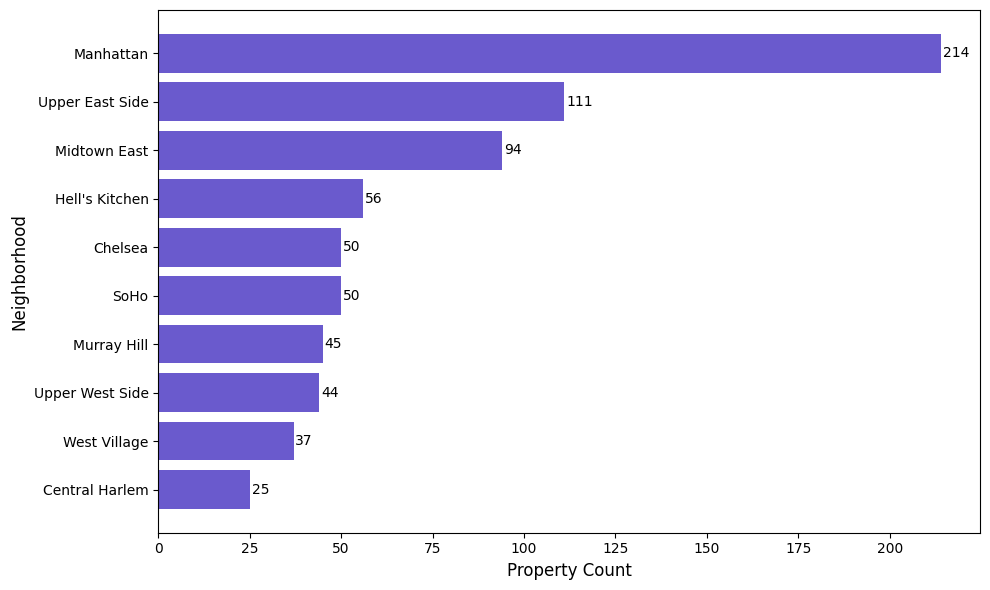

In [43]:

# Top 10 Neighborhoods where properties within 200 meters away from transportation hub and have a walk score/transit of 70
plt.figure(figsize=(10, 6))
bars = plt.barh(top_10['Loc_Neighborhood'], top_10['prop_200_meters'], color='slateblue')

# Annotate the counts on the bars
for bar in bars:
    plt.text(
        bar.get_width() + 0.5,  
        bar.get_y() + bar.get_height() / 2,  
        f'{int(bar.get_width())}',  
         va='center', fontsize=10, color='black'
    )

# Set labels and axis properties
plt.xlabel('Property Count', fontsize=12)
plt.ylabel('Neighborhood', fontsize=12)
plt.gca().invert_yaxis()  # Invert the y-axis to have the highest count at the top
plt.tight_layout()
plt.savefig("C:/Users/1999i/Documents/data mange/Lab Lectures/Project/plots/transportation_hubs.jpg", dpi=300,  bbox_inches='tight')

plt.show()




#### **Schools**

In [44]:
# properties within 200 meters away from schools and have a walk score/bike score/transit score of 90.
query = {
    "distance_to_school": {"$lte": 200},
    "Walk Score": {"$gte": 70}, 
    "Transit Score": {"$gte": 70},
    "Bike Score": {"$gte": 70}
}

results = collection.find(query)


dati = list(results)

qq = pd.DataFrame(dati)
prop = qq.shape
print(f"Total number of individual properties within 200 meters away from schools and have a walk score/bike score/transit score of 70: {prop}")

Total number of individual properties within 200 meters away from schools and have a walk score/bike score/transit score of 70: (1071, 24)


In [45]:
yr = qq[['Loc_Neighborhood']]
yr18 = yr.groupby(['Loc_Neighborhood']).size().reset_index(name='prop_200_meters')
top_10 = yr18.sort_values(by="prop_200_meters", ascending=False).head(10)
top_10

,Loc_Neighborhood,prop_200_meters
11,Manhattan,270
19,Upper East Side,157
12,Midtown East,99
9,Hell's Kitchen,72
2,Chelsea,71
20,Upper West Side,71
16,SoHo,61
13,Murray Hill,49
22,West Village,42
8,Greenwich Village,32


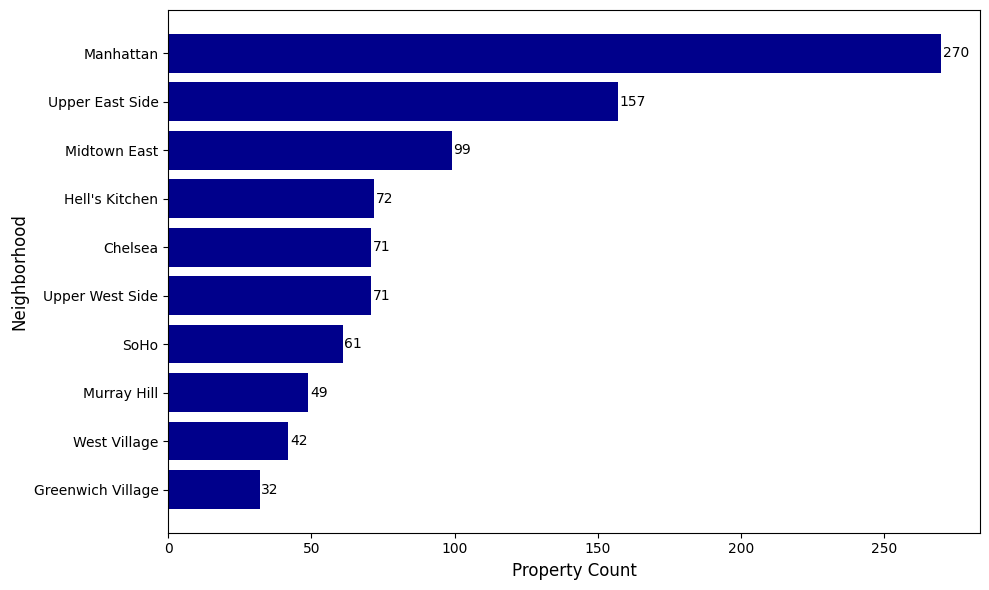

In [46]:
# Top 10 Neighborhoods where properties within 00 meters away from schools and have a walk score/bike score/transit score of 70
plt.figure(figsize=(10, 6))
bars = plt.barh(top_10['Loc_Neighborhood'], top_10['prop_200_meters'], color='darkblue')

# Annotate the counts on the bars
for bar in bars:
    plt.text(
        bar.get_width() + 0.5,  
        bar.get_y() + bar.get_height() / 2,  
        f'{int(bar.get_width())}',  
         va='center', fontsize=10, color='black'
    )

# Set labels and axis properties
plt.xlabel('Property Count', fontsize=12)
plt.ylabel('Neighborhood', fontsize=12)
plt.gca().invert_yaxis()  # Invert the y-axis to have the highest count at the top
plt.tight_layout()


plt.savefig("C:/Users/1999i/Documents/data mange/Lab Lectures/Project/plots/schools.jpg", dpi=300, bbox_inches="tight")
plt.show()

#### **Hospitals**

In [47]:
# properties within 1000 meters away from hospitals and have a walk score//transit score of 70.
query = {
    "dist_hospital_meters": {"$lte": 1000},
    "Walk Score": {"$gte": 70}, 
    "Transit Score": {"$gte": 70}
    
}

results = collection.find(query)


dati = list(results)

qqq = pd.DataFrame(dati)
prop = qqq.shape
print(f"Total number of individual properties within 1000 meters away from hospitals and have a walk score/transit score of 70: {prop}")

Total number of individual properties within 1000 meters away from hospitals and have a walk score/transit score of 70: (638, 24)


In [48]:
yr = qqq[['Loc_Neighborhood']]
yr18 = yr.groupby(['Loc_Neighborhood']).size().reset_index(name='prop_1000_meters')
top_10 = yr18.sort_values(by="prop_1000_meters", ascending=False).head(10)
top_10

,Loc_Neighborhood,prop_1000_meters
14,Upper East Side,155
7,Manhattan,117
8,Midtown East,97
1,Chelsea,63
9,Murray Hill,49
15,West Village,42
6,Hell's Kitchen,41
5,Greenwich Village,32
12,SoHo,14
3,East Village,11


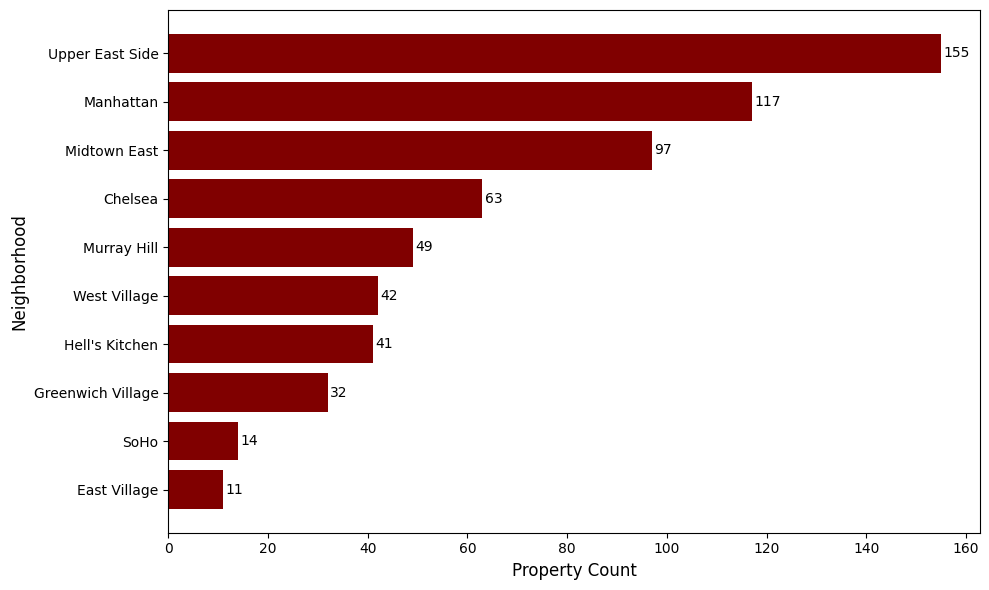

In [49]:
# Top 10 Neighborhoods where propertiesproperties within 1000 meters away from hospitals and have a walk score//transit score of 70.
plt.figure(figsize=(10, 6))
bars = plt.barh(top_10['Loc_Neighborhood'], top_10['prop_1000_meters'], color='maroon')

# Annotate the counts on the bars
for bar in bars:
    plt.text(
        bar.get_width() + 0.5,  
        bar.get_y() + bar.get_height() / 2,  
        f'{int(bar.get_width())}',  
         va='center', fontsize=10, color='black'
    )

# Set labels and axis properties
plt.xlabel('Property Count', fontsize=12)
plt.ylabel('Neighborhood', fontsize=12)
plt.gca().invert_yaxis()  # Invert the y-axis to have the highest count at the top
plt.tight_layout()


plt.savefig("C:/Users/1999i/Documents/data mange/Lab Lectures/Project/plots/hospitals.jpg", dpi=300, bbox_inches="tight")
plt.show()

### **4. Highest Individual housing listed.**

In [53]:
# Top 15 individual property information
top_houses = collection.find({}, {'_id': 0, 'BROKERTITLE': 1, 'PRICE': 1, 'LATITUDE': 1, 'LONGITUDE': 1, 'Loc_Neighborhood': 1}).sort('PRICE', -1).limit(25)

#results = collection.find(query)


dati = list(top_houses)
a = pd.DataFrame(dati)
a['PRICE_IN_MILLIONS'] = (a['PRICE'] / 1e6).round(2)
a

,BROKERTITLE,Loc_Neighborhood,LATITUDE,LONGITUDE,PRICE,PRICE_IN_MILLIONS
0,Brokered by ANNE LOPA REAL ESTATE,Charleston,40.518484,-74.224418,2147483647,2147.48
1,Brokered by Serhant,Hell's Kitchen,40.766393,-73.980991,195000000,195.00
2,Brokered by COMPASS,Upper East Side,40.775642,-73.964247,60000000,60.00
3,Brokered by Douglas Elliman - 575 Madison Ave,Hell's Kitchen,40.761600,-73.976191,56000000,56.00
4,Brokered by Douglas Elliman - 575 Madison Ave,Manhattan,40.782238,-73.984632,55000000,55.00
5,"Brokered by Nest Seekers International, Midtown",SoHo,40.726633,-74.008832,50000000,50.00
6,Brokered by Sotheby's International Realty - E...,Upper East Side,40.768973,-73.969136,44500000,44.50
7,Brokered by Douglas Elliman - New Development,Tribeca,40.715351,-74.012844,40000000,40.00
8,Brokered by Douglas Elliman - 575 Madison Ave,Upper East Side,40.776402,-73.962948,36000000,36.00
9,Brokered by Corcoran West Side,Chelsea,40.743390,-73.997378,34000000,34.00


In [54]:
map = folium.Map(location=[a.LATITUDE.mean(), a.LONGITUDE.mean()], zoom_start=15, control_scale=True,
                 tiles="OpenStreetMap")


for index, location_info in a.iterrows():
    folium.Marker(
        [location_info["LATITUDE"], location_info["LONGITUDE"]],
        popup=f" Location: {location_info['Loc_Neighborhood']}, Broker Title: {location_info['BROKERTITLE']}, Price in millions: {location_info['PRICE_IN_MILLIONS']}"
    ).add_to(map)

for index, location_info in a.iterrows():
    folium.Marker(
        [location_info["LATITUDE"], location_info["LONGITUDE"]],
        # popup=folium.Popup(f'Crime Count: {location_info["crime_count"]}', max_width=300),
        popup=f"Average price per SqFt: {location_info['PRICE_IN_MILLIONS']}",
        icon=folium.DivIcon(
            icon_size=(150, 36),
            icon_anchor=(0, 0),
            html=f'<div style="font-size: 12pt; color: darkblue;">{location_info["PRICE_IN_MILLIONS"]}</div>',
        )
    ).add_to(map)


# Save the map
map_save_path = 'C:/Users/1999i/Documents/data mange/Lab Lectures/Project/plots/individual_houses.html'

map.save(map_save_path)#map.save(map_save_path)
map

In [51]:
yr = a[['Loc_Neighborhood']]
yr18 = yr.groupby(['Loc_Neighborhood']).size().reset_index(name='count_proprty')
top_10 = yr18.sort_values(by="count_proprty", ascending=False).head(10)
top_10

,Loc_Neighborhood,count_proprty
7,Upper East Side,7
1,Chelsea,4
5,SoHo,4
2,Hell's Kitchen,3
3,Manhattan,3
0,Charleston,1
4,Murray Hill,1
6,Tribeca,1
8,West Village,1


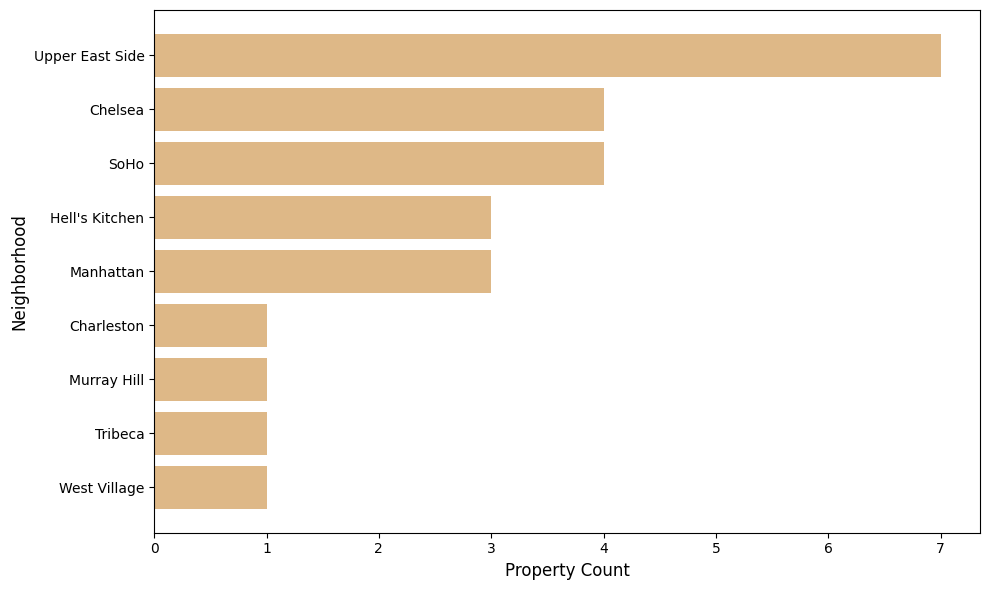

In [52]:
# Highest price Individual Properties
plt.figure(figsize=(10, 6))
bars = plt.barh(top_10['Loc_Neighborhood'], top_10['count_proprty'], color='burlywood')

# Set labels and axis properties
plt.xlabel('Property Count', fontsize=12)
plt.ylabel('Neighborhood', fontsize=12)
plt.gca().invert_yaxis()  # Invert the y-axis to have the highest count at the top
plt.tight_layout()


plt.savefig("C:/Users/1999i/Documents/data mange/Lab Lectures/Project/plots/highest_property_prices.jpg", dpi=300, bbox_inches="tight") 
plt.show()